In [2]:
pip install xlrd

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
#from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
data=pd.read_excel("D:\\collage\\Semester 4\\default of credit card clients (1).xls")
print(data)
x=data.sample(10000)
x=pd.DataFrame(x.drop(data.columns[0],axis=1))


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    166987.600000      1.601900      1.853700      1.555700     35.525500   
std     129525.923053      0.489531      0.785212      0.522613      9.221803   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     42.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3        PAY_4         PAY_5  \
count  10000.000000  10000.000000  10000.000000  10000.00000  10000.000000   
mean      -0.029900     -0.140300     -0.179600     -0.21710     -0.276500   
std        1.136985      1.218427   

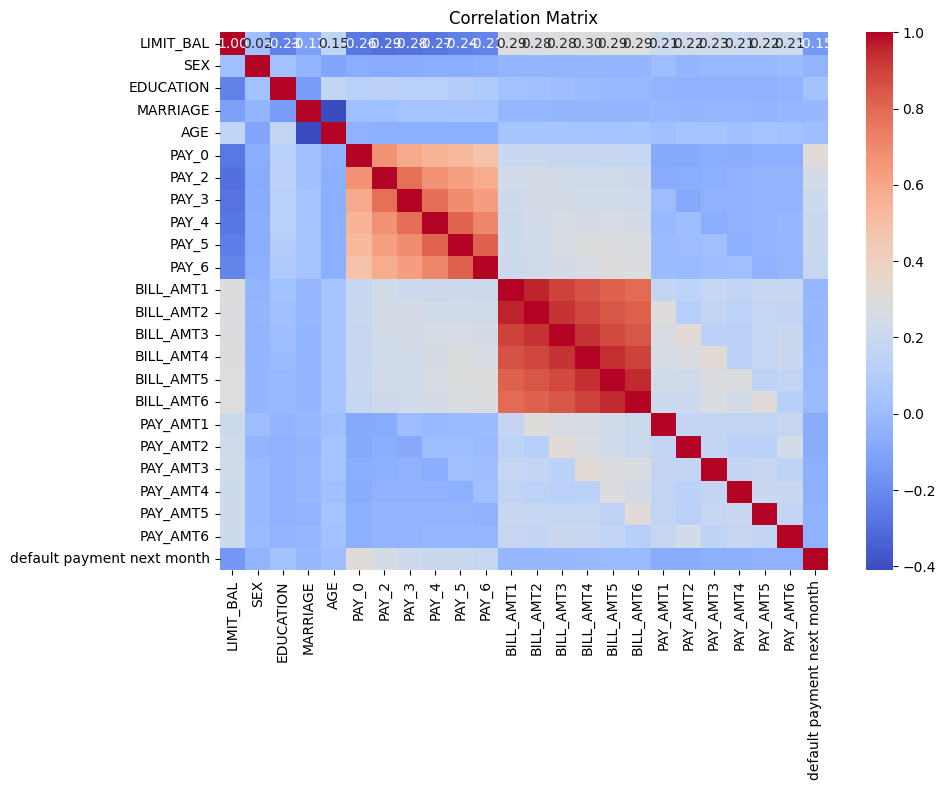

In [4]:
print(x.describe(include='all'))
correlation_matrix = x.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and adjust layout
plt.title('Correlation Matrix')
plt.tight_layout()

# Show plot
plt.show()

In [5]:
print(x.duplicated().to_string().count('True'))
x.drop_duplicates(inplace=True)
print(x.duplicated().to_string().count('True'))

nan_count = x.isna().sum()  # Count NaN values in the entire DataFrame
print("Total NaN count in DataFrame:", nan_count)
x.fillna(0, inplace=True)

4
0
Total NaN count in DataFrame: LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [6]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 8468 to 22779
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   9996 non-null   int64
 1   SEX                         9996 non-null   int64
 2   EDUCATION                   9996 non-null   int64
 3   MARRIAGE                    9996 non-null   int64
 4   AGE                         9996 non-null   int64
 5   PAY_0                       9996 non-null   int64
 6   PAY_2                       9996 non-null   int64
 7   PAY_3                       9996 non-null   int64
 8   PAY_4                       9996 non-null   int64
 9   PAY_5                       9996 non-null   int64
 10  PAY_6                       9996 non-null   int64
 11  BILL_AMT1                   9996 non-null   int64
 12  BILL_AMT2                   9996 non-null   int64
 13  BILL_AMT3                   9996 non-null   int64
 14  BILL_AMT4

In [7]:
x[:][1:].mean()

LIMIT_BAL                     166987.093547
SEX                                1.601801
EDUCATION                          1.853927
MARRIAGE                           1.555878
AGE                               35.524062
PAY_0                             -0.030215
PAY_2                             -0.139770
PAY_3                             -0.179090
PAY_4                             -0.216608
PAY_5                             -0.275838
PAY_6                             -0.297349
BILL_AMT1                      50460.952276
BILL_AMT2                      48461.507054
BILL_AMT3                      46527.937369
BILL_AMT4                      42877.147774
BILL_AMT5                      39579.990395
BILL_AMT6                      38371.115058
PAY_AMT1                        5565.469435
PAY_AMT2                        5968.608504
PAY_AMT3                        5178.767684
PAY_AMT4                        4607.769185
PAY_AMT5                        4795.895048
PAY_AMT6                        

#### Detecting The Otliers

In [8]:
y=x['default payment next month']
x=x.drop(columns=['default payment next month'], axis=1)
x = x.apply(pd.to_numeric, errors='coerce')

# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers

# Detect outliers in each column of the DataFrame
outliers =x.apply(detect_outliers_zscore)

# Print outliers
print("Outliers:")
print(outliers.count())

Outliers:
LIMIT_BAL     38
SEX            0
EDUCATION    105
MARRIAGE       0
AGE           46
PAY_0         46
PAY_2         64
PAY_3         47
PAY_4         47
PAY_5         50
PAY_6         41
BILL_AMT1    234
BILL_AMT2    233
BILL_AMT3    229
BILL_AMT4    236
BILL_AMT5    214
BILL_AMT6    207
PAY_AMT1     135
PAY_AMT2     145
PAY_AMT3     105
PAY_AMT4     156
PAY_AMT5     129
PAY_AMT6     130
dtype: int64


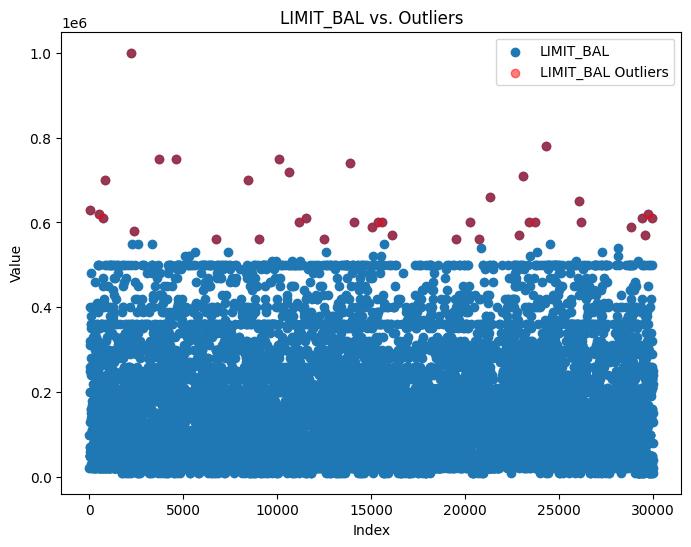

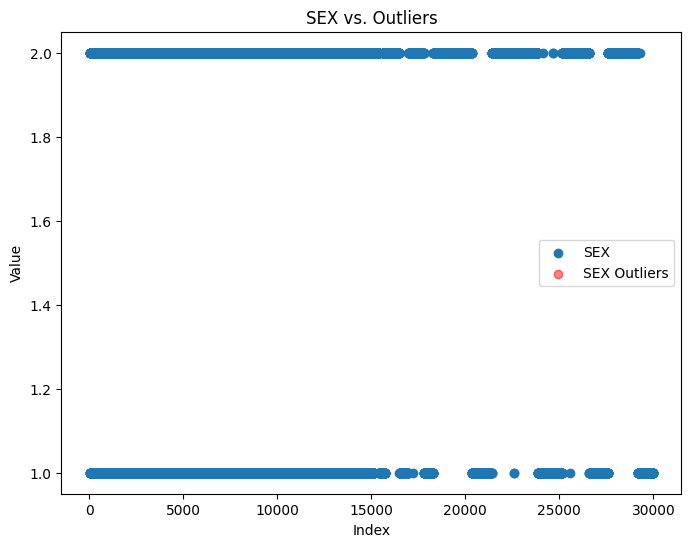

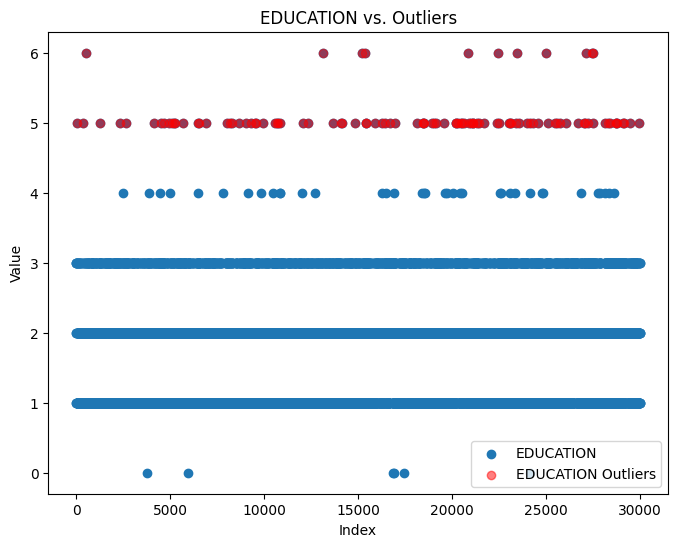

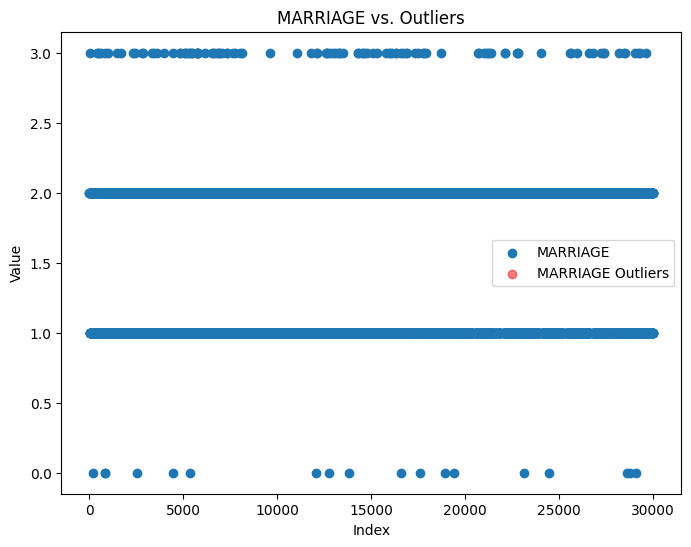

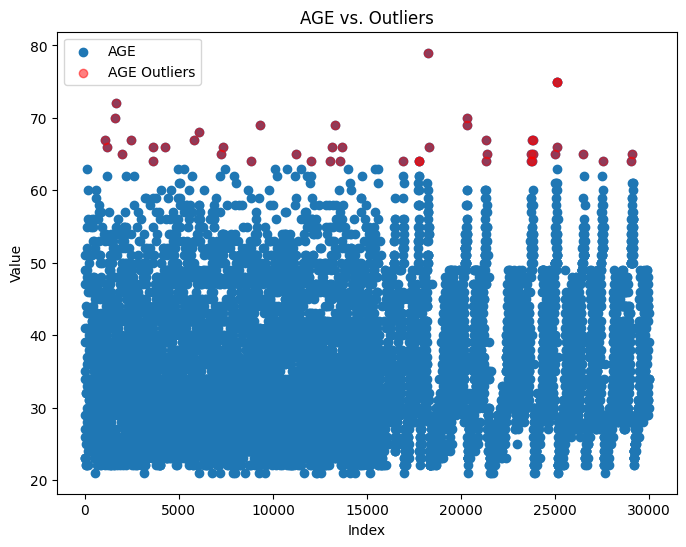

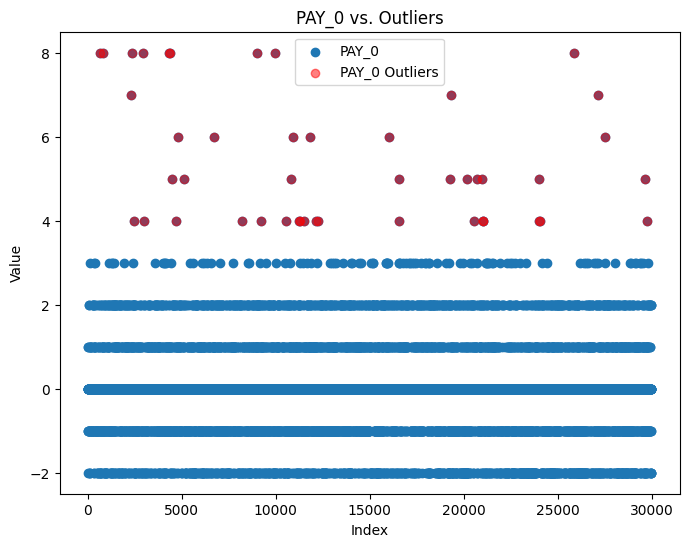

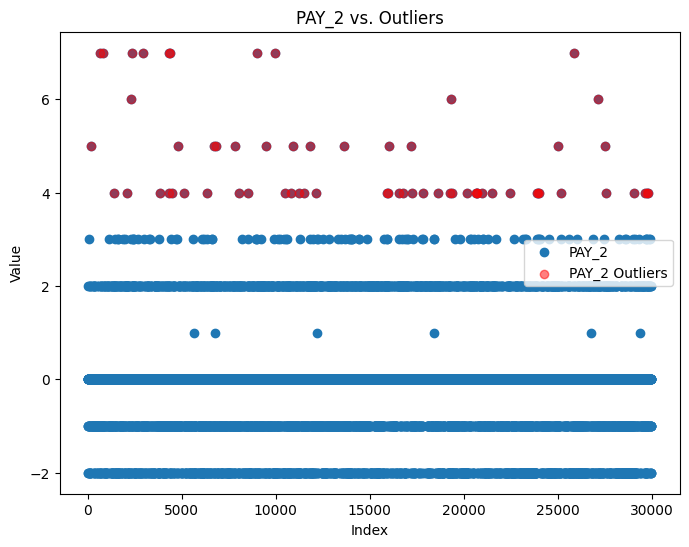

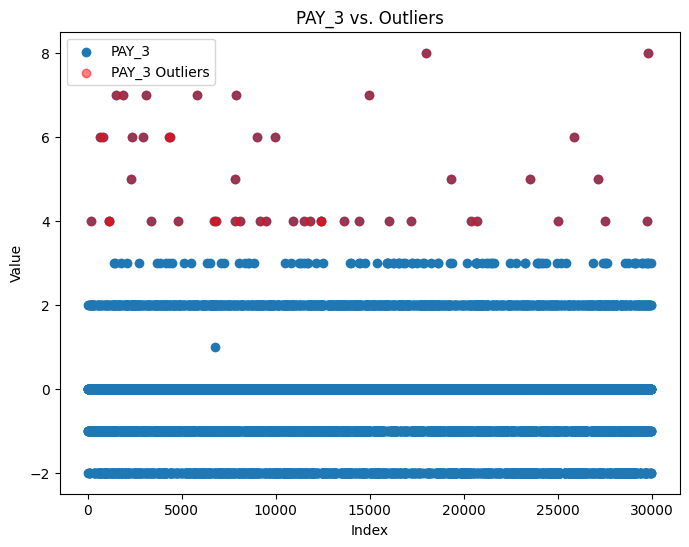

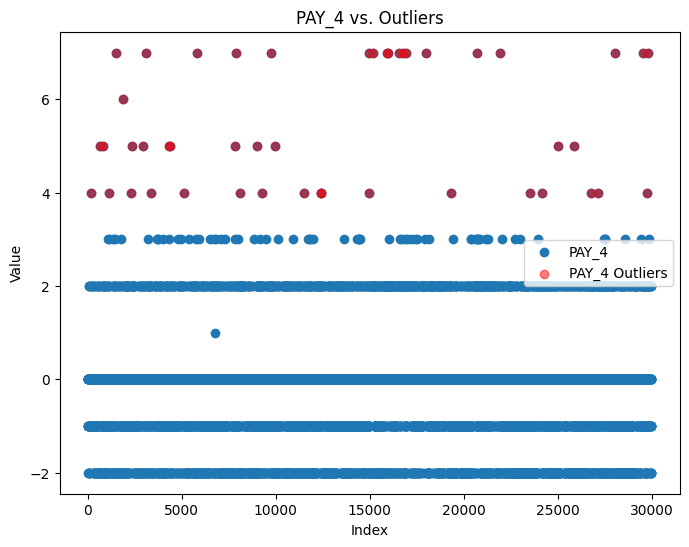

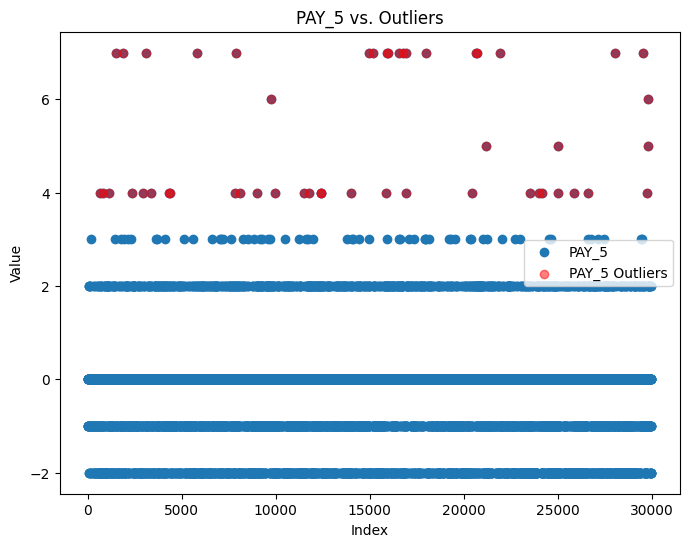

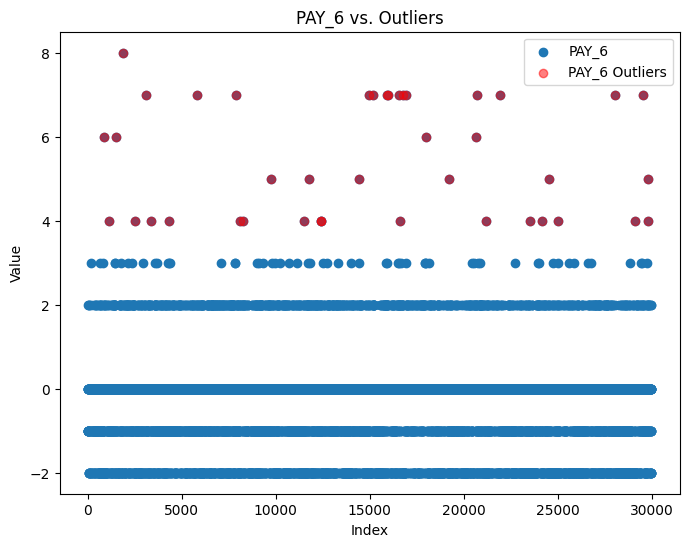

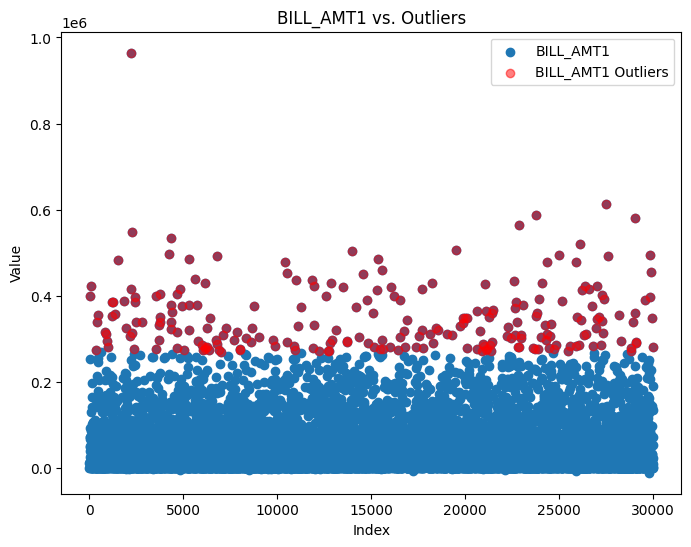

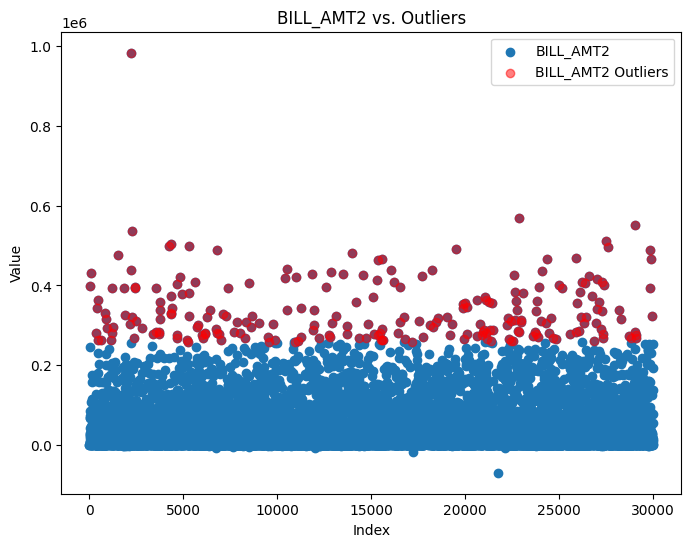

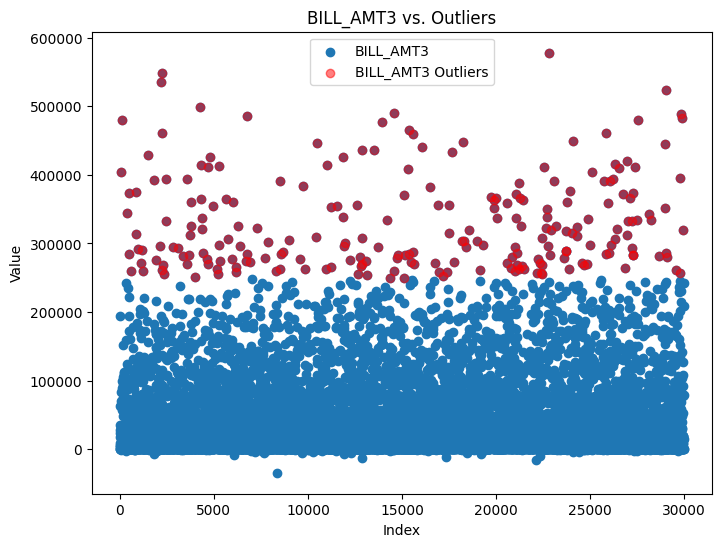

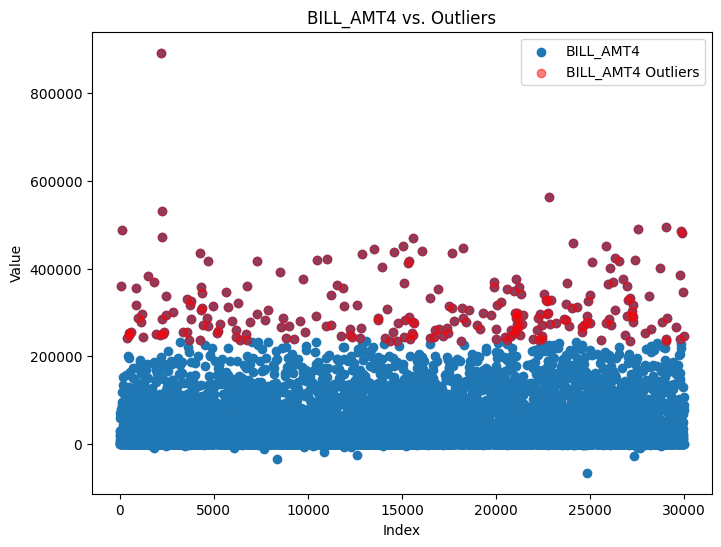

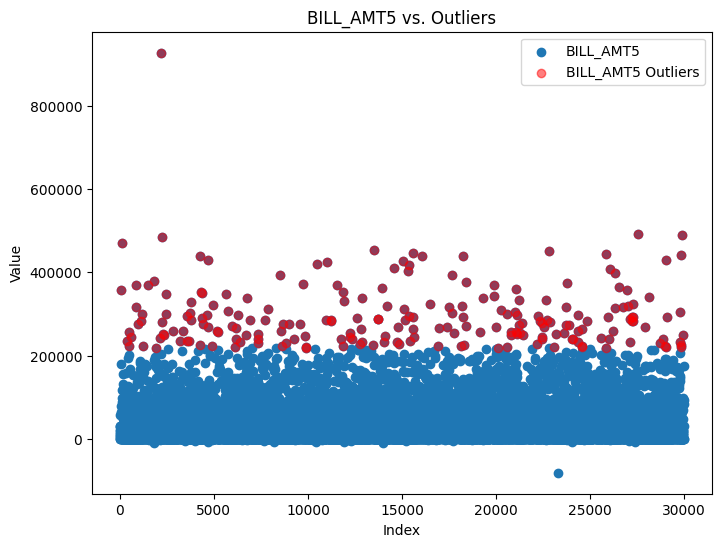

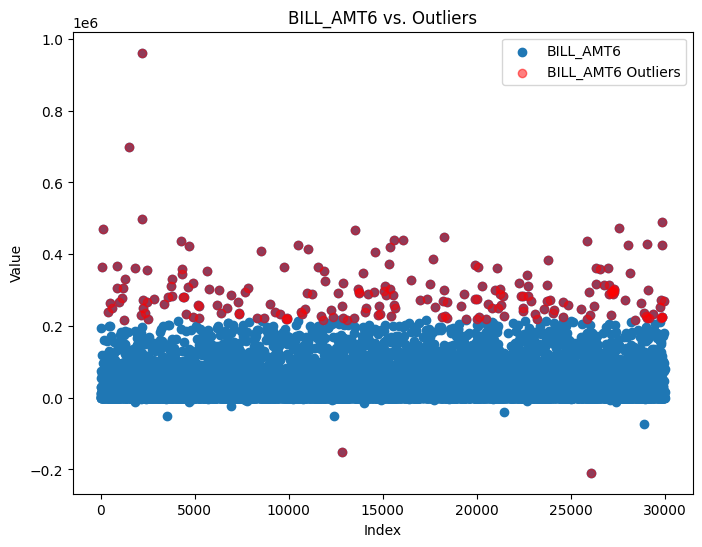

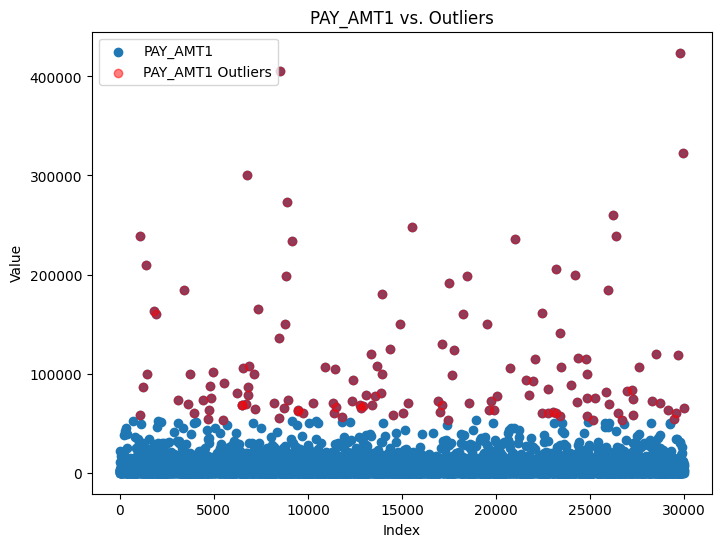

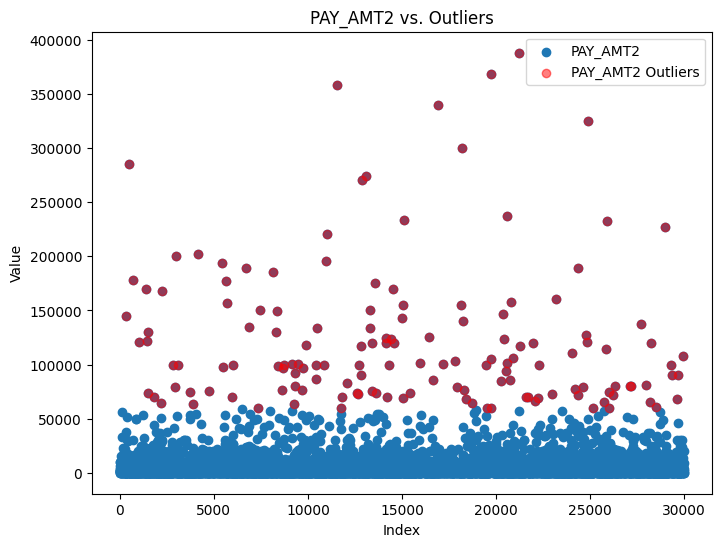

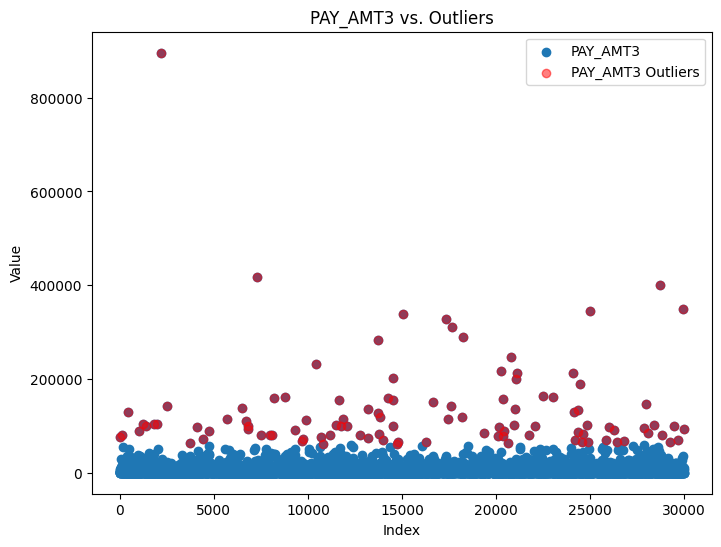

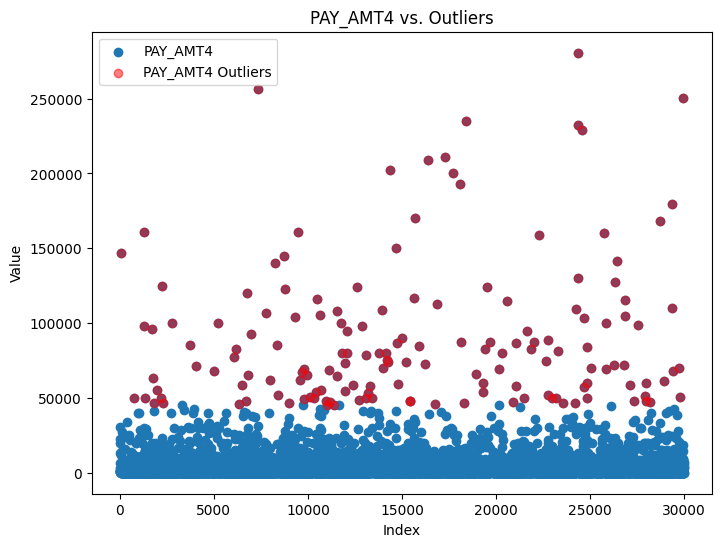

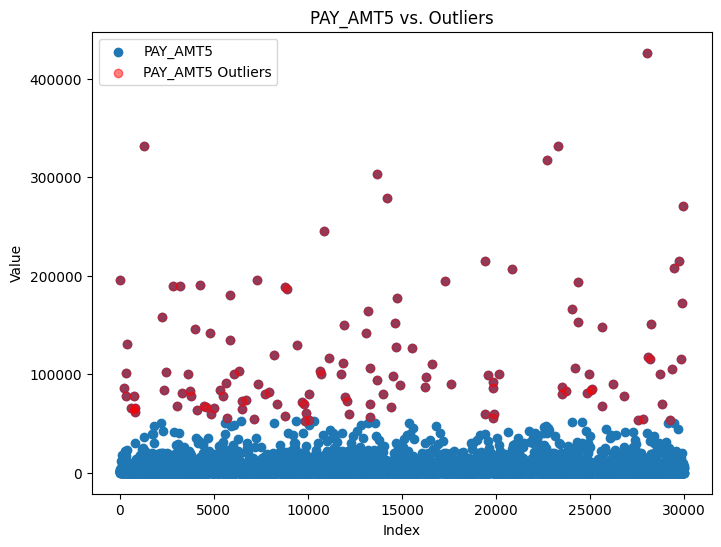

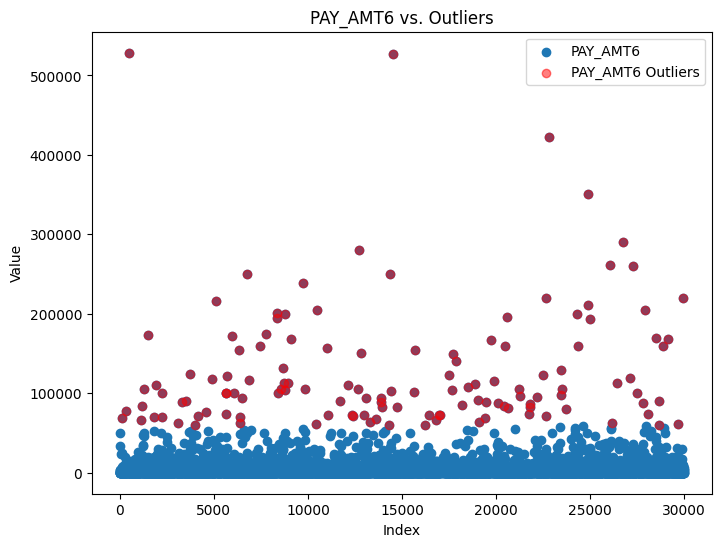

In [9]:
cols=[]
for col in x.columns:
    cols.append(col)
    cols.append(col)
    plt.figure(figsize=(8, 6))
    plt.scatter(x.index, x[col], label=col)
    plt.scatter(outliers.index, outliers[col], color='red', label=f'{col} Outliers', alpha=0.5)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{col} vs. Outliers')
    plt.legend()
    plt.show()

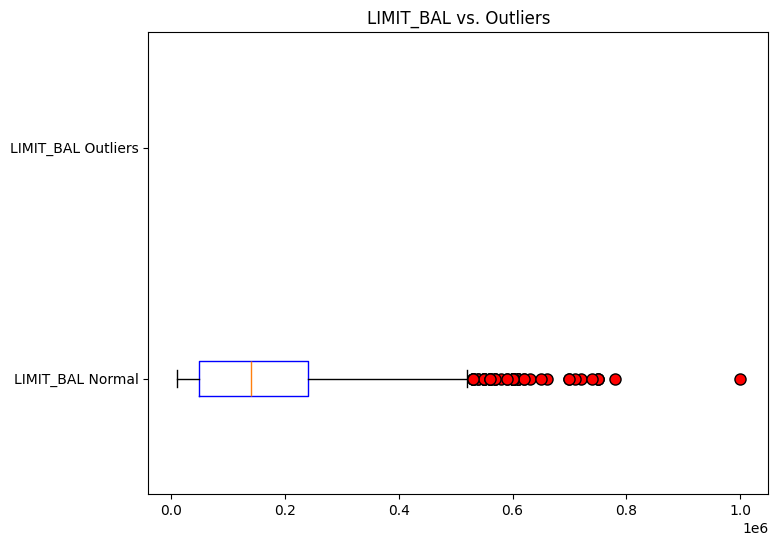

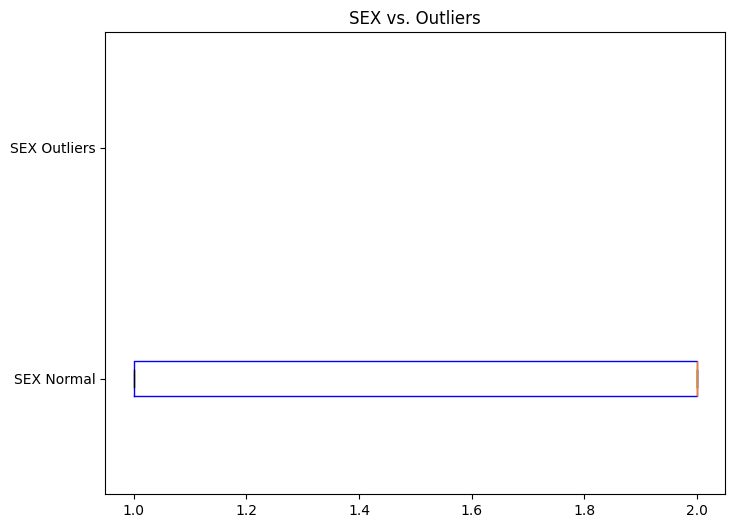

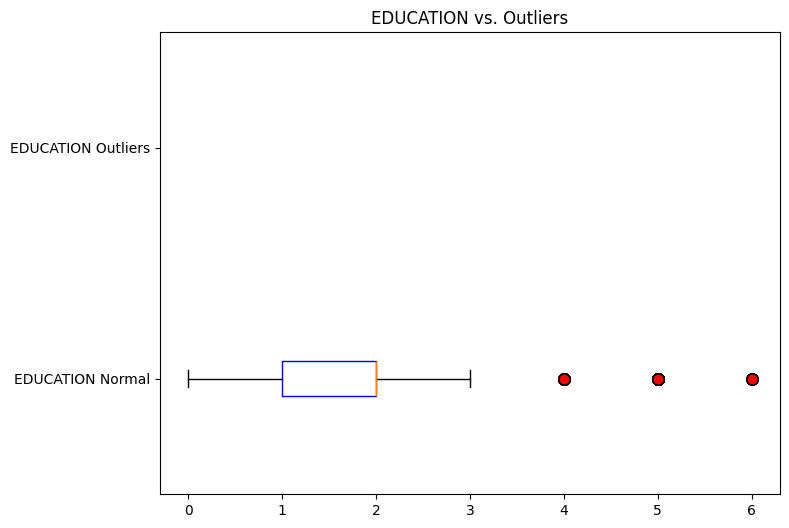

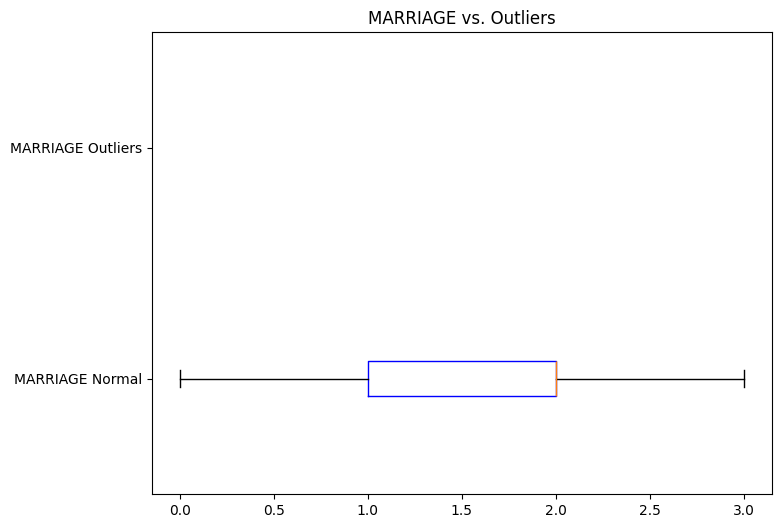

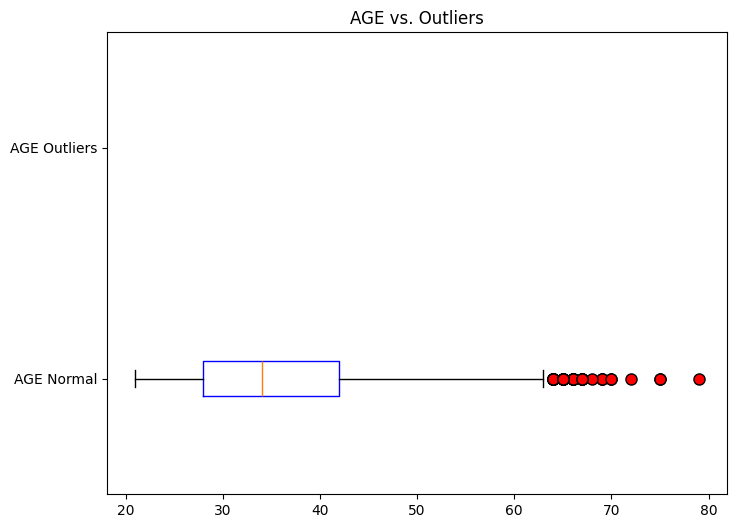

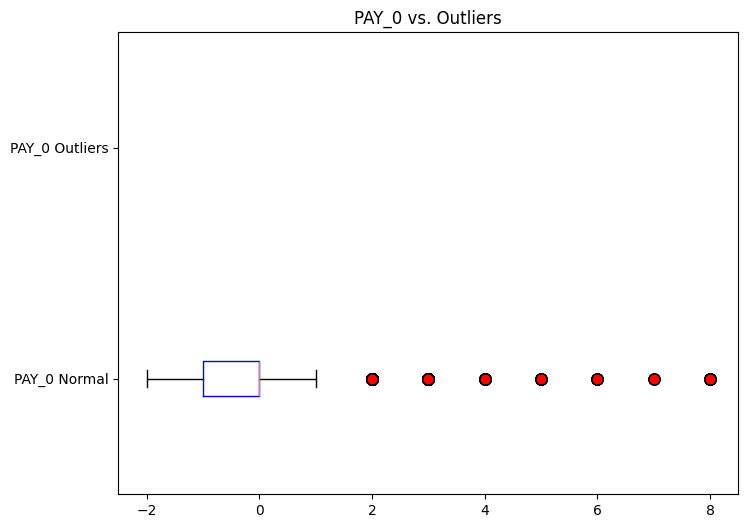

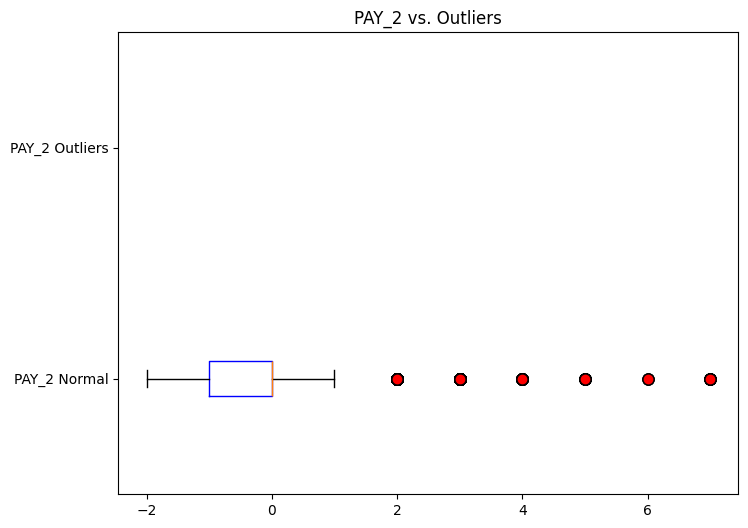

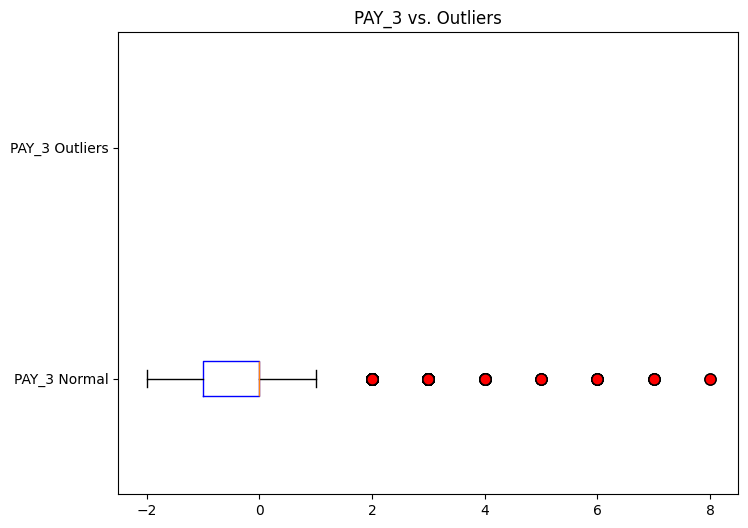

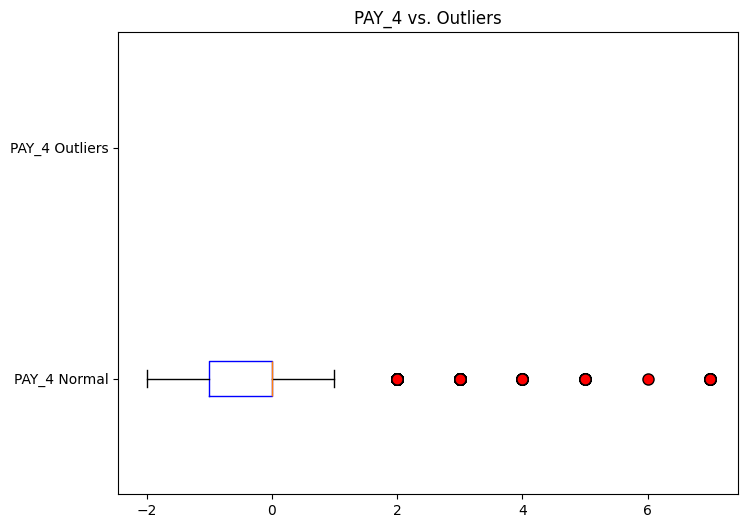

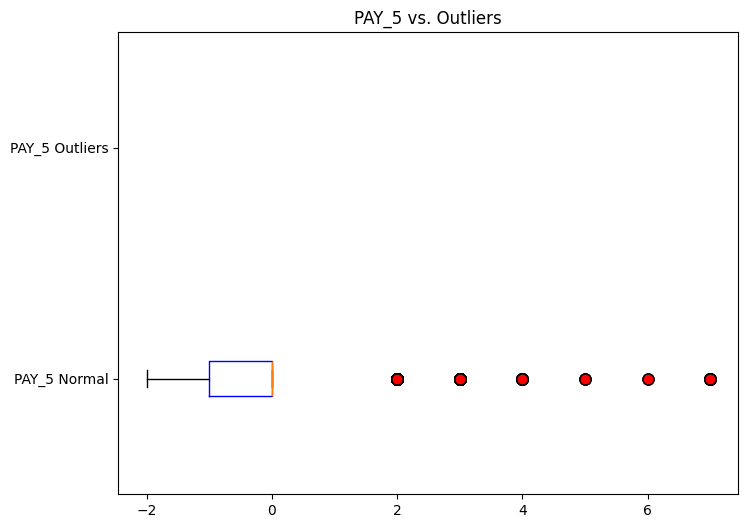

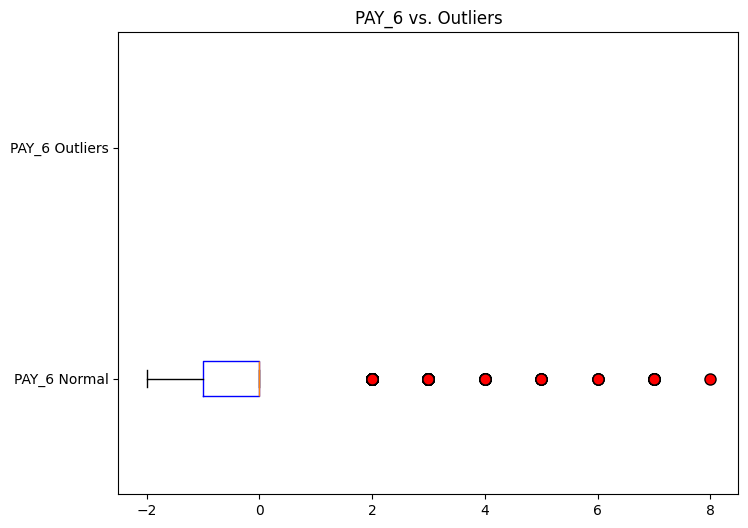

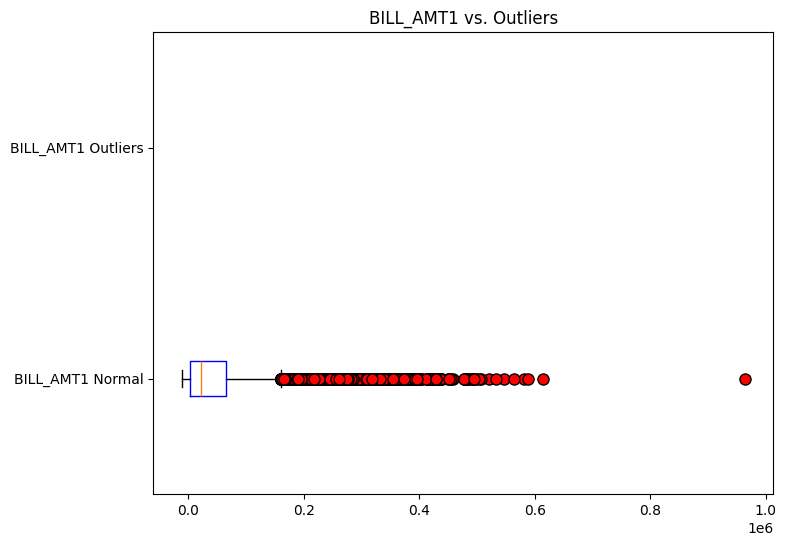

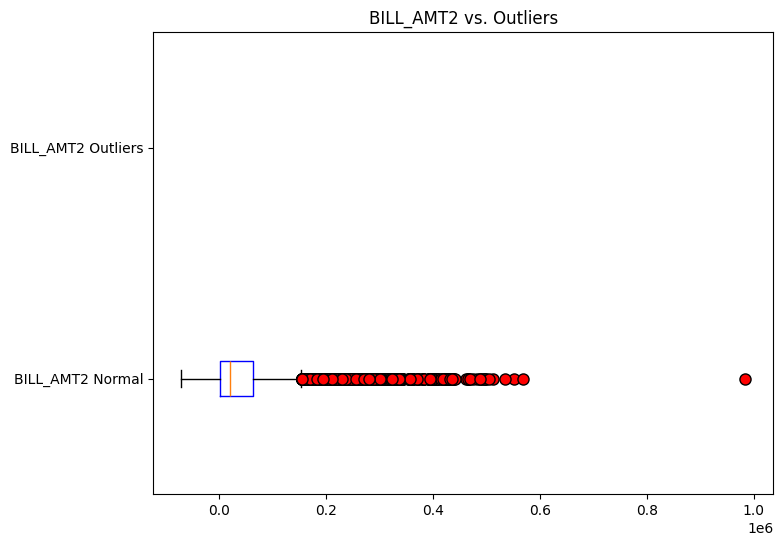

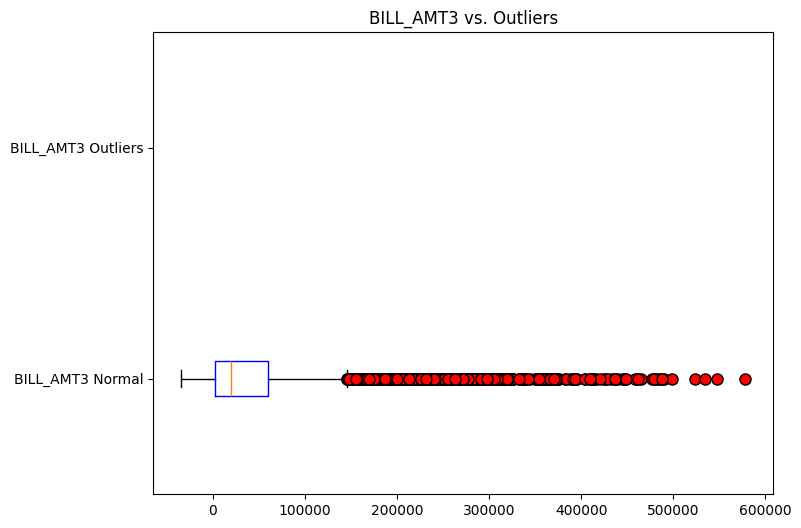

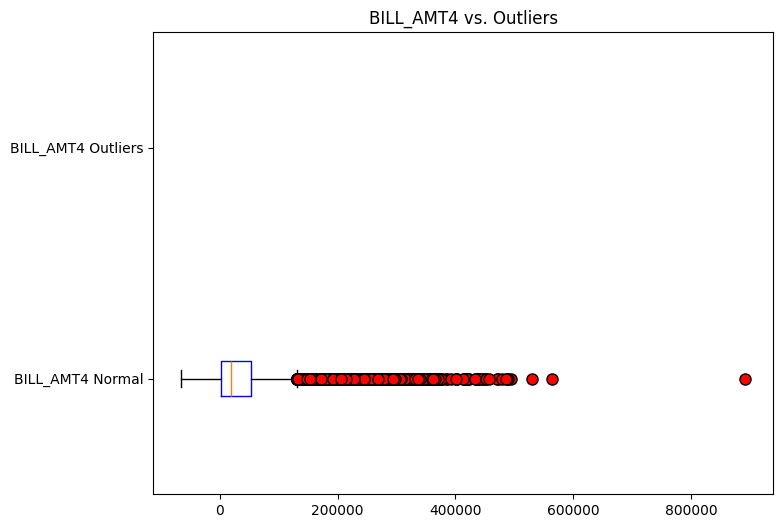

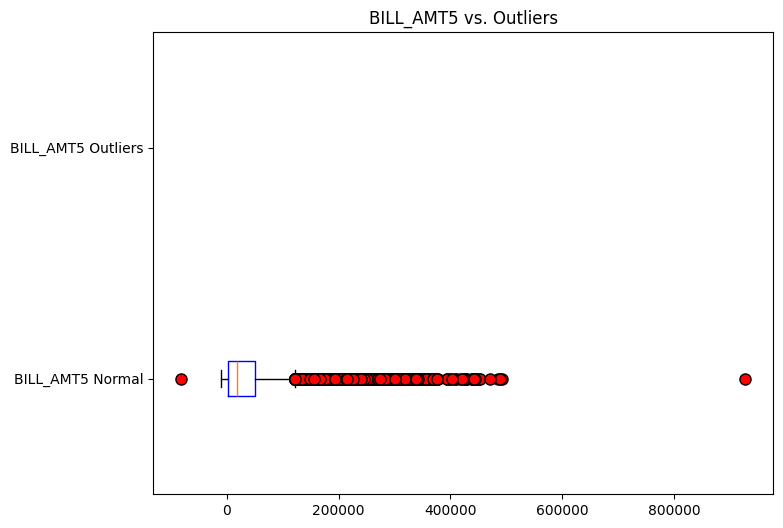

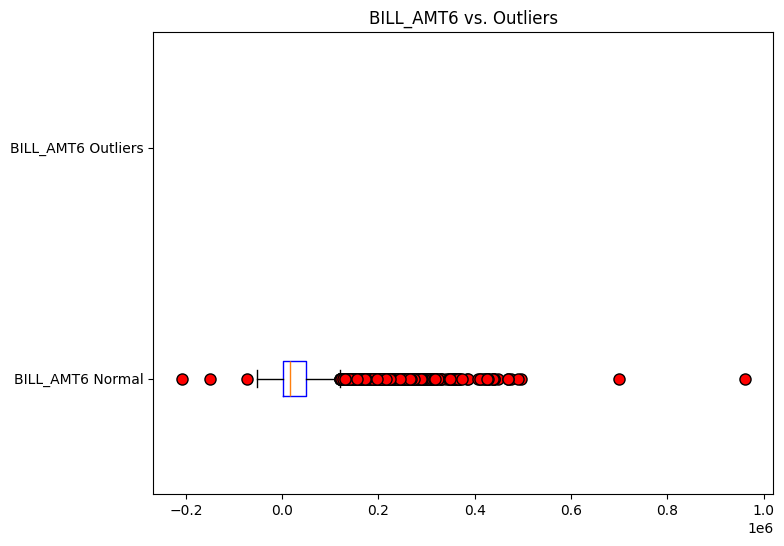

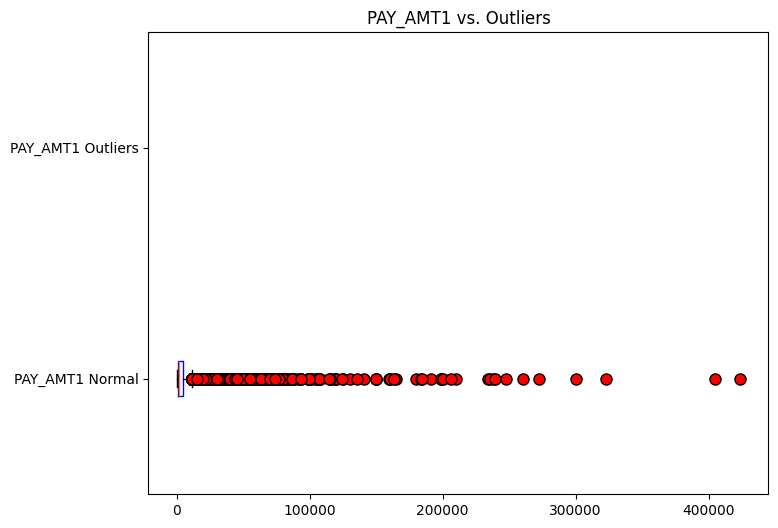

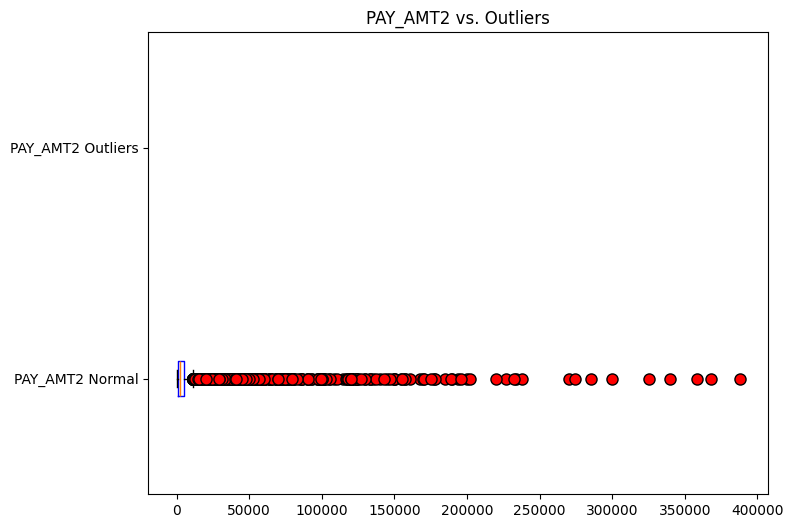

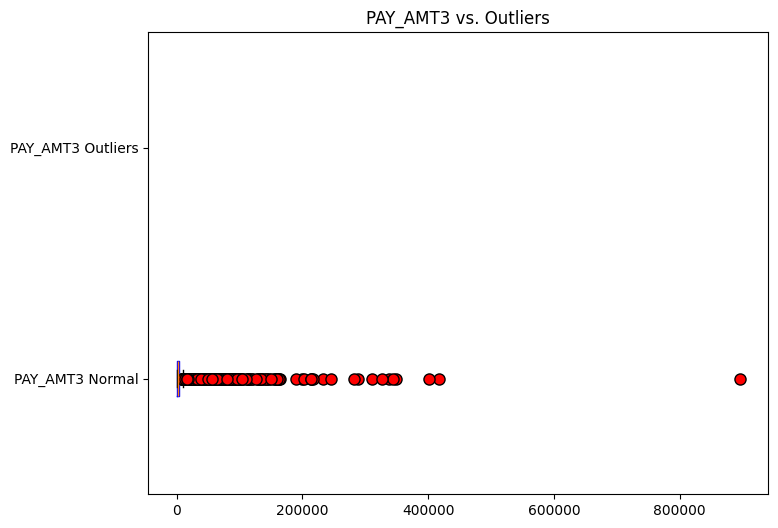

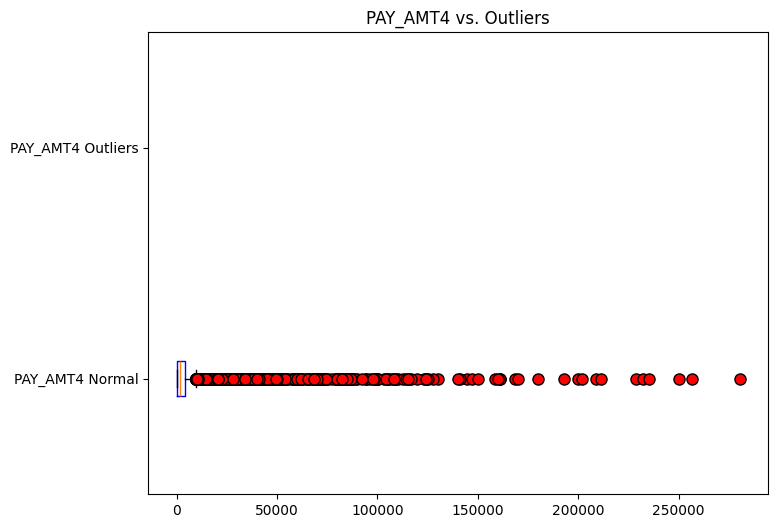

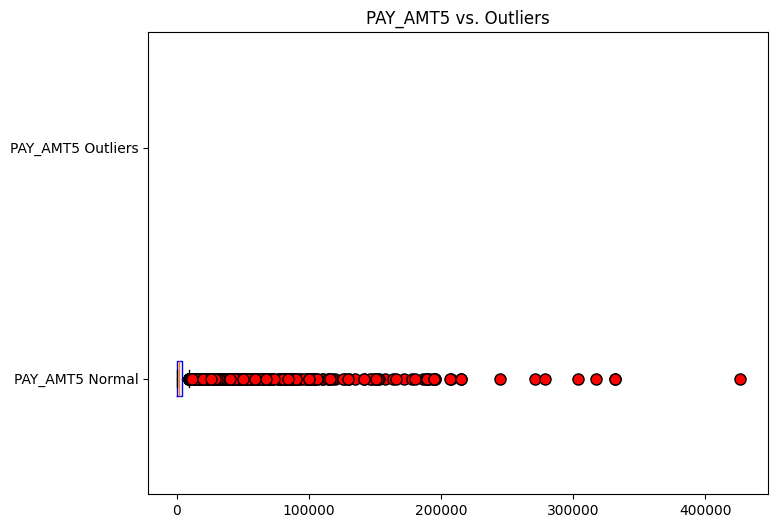

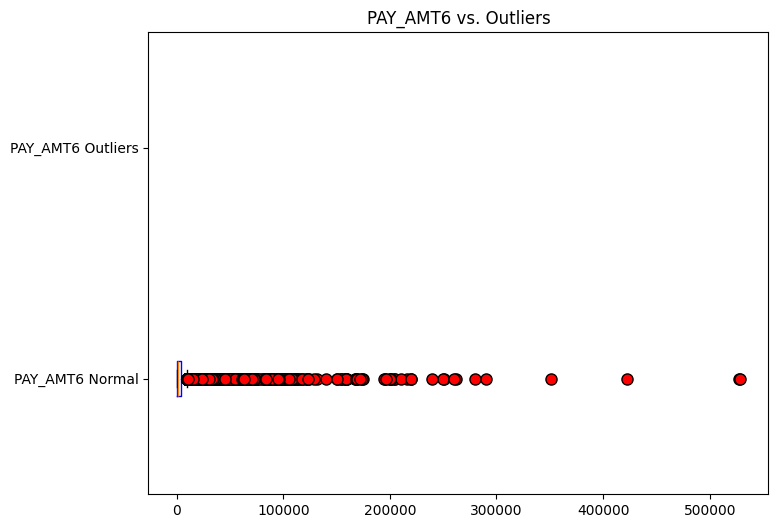

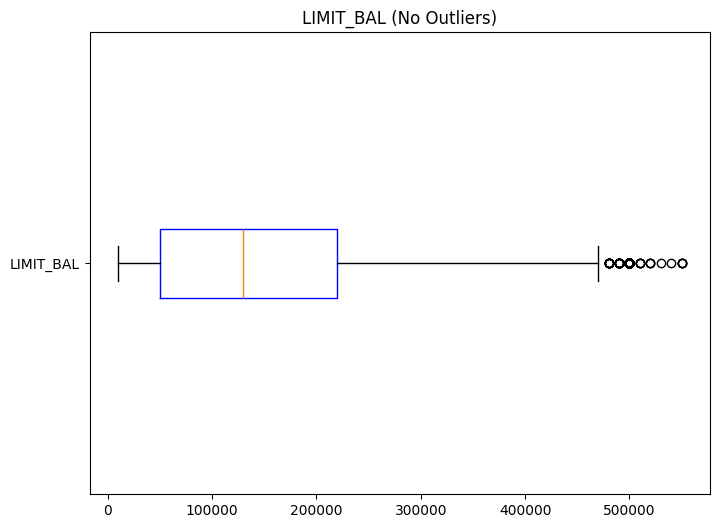

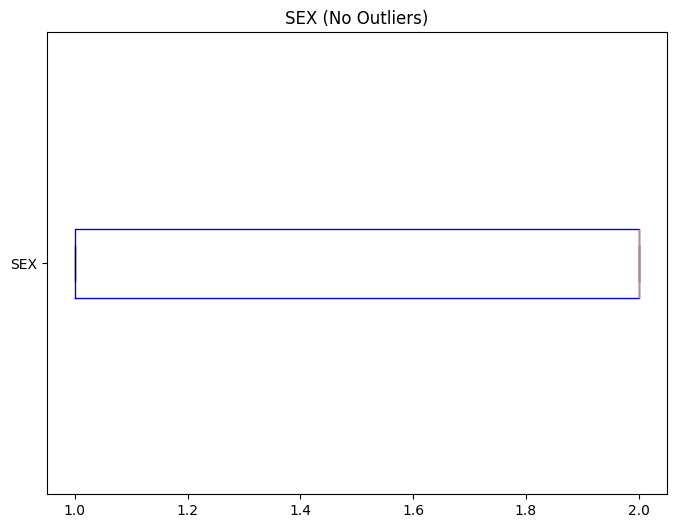

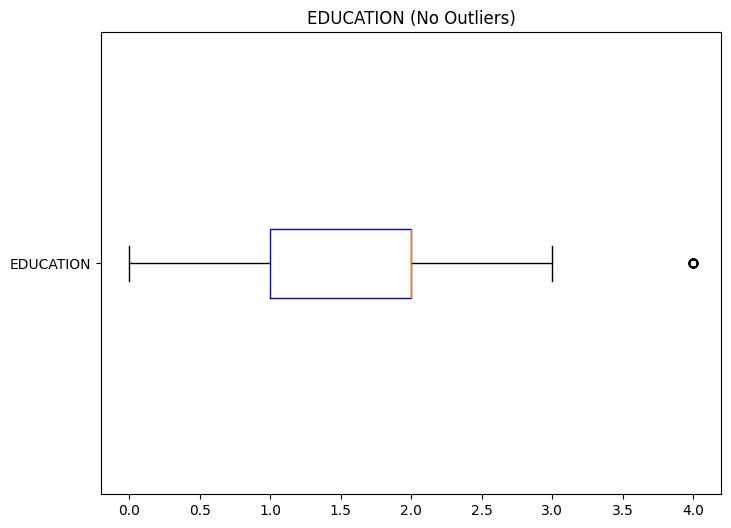

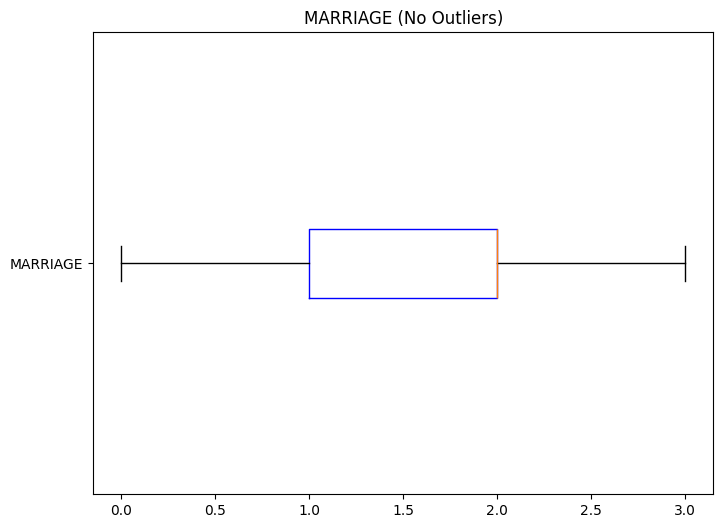

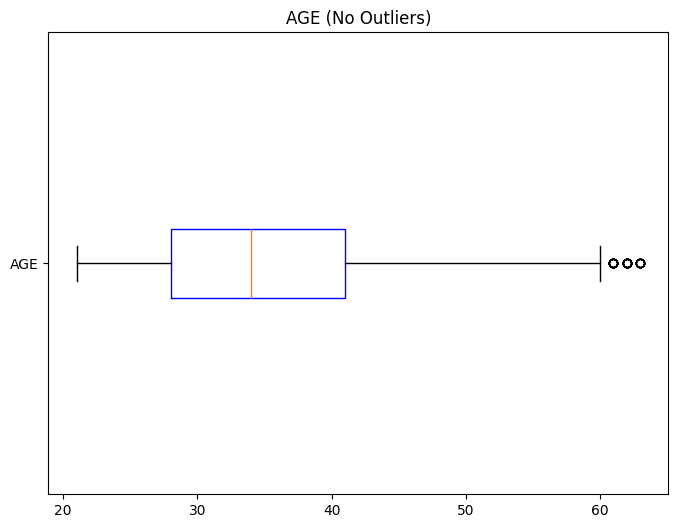

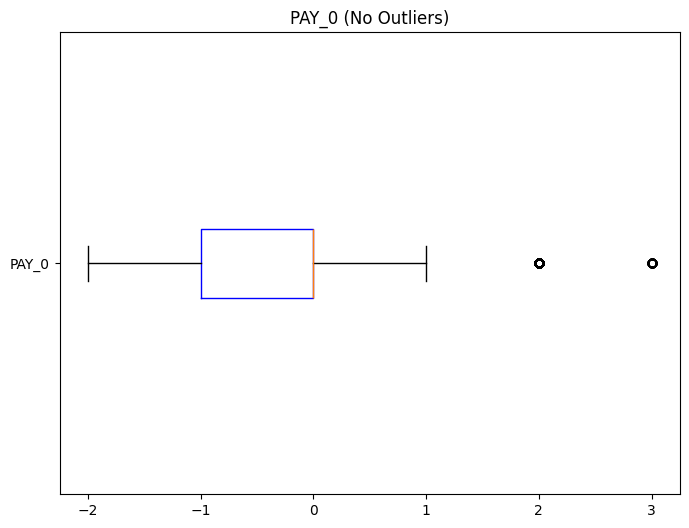

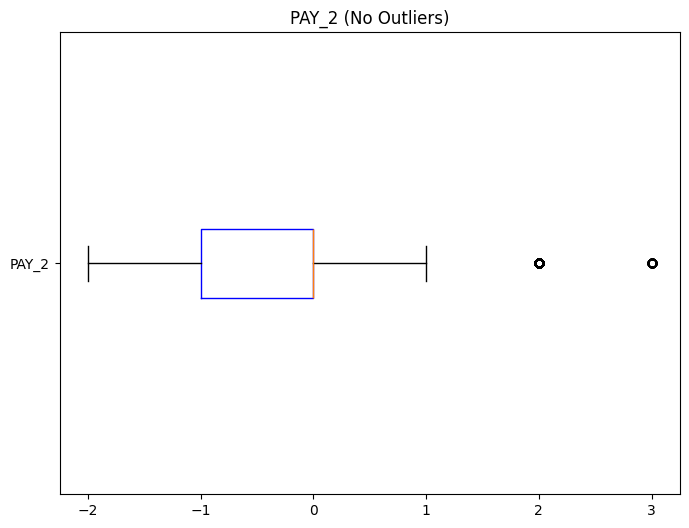

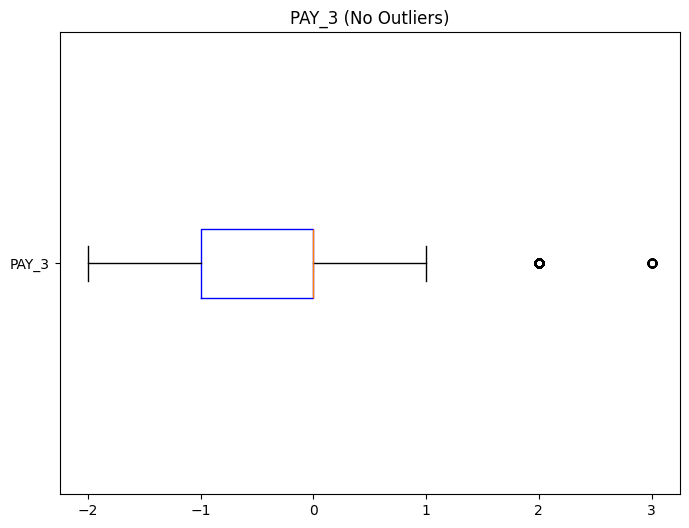

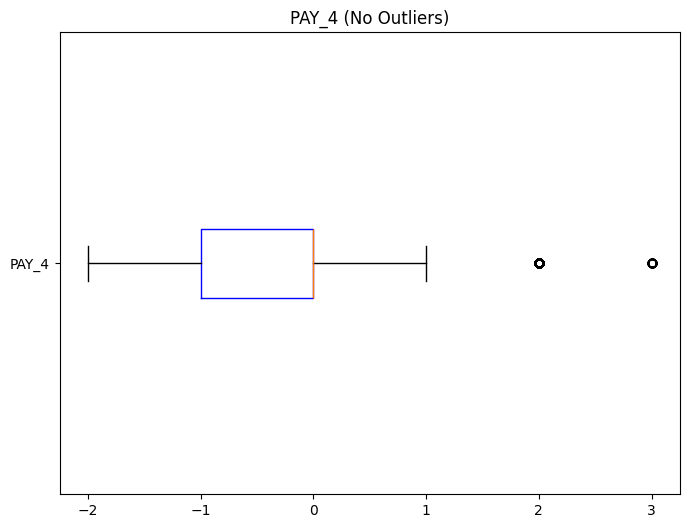

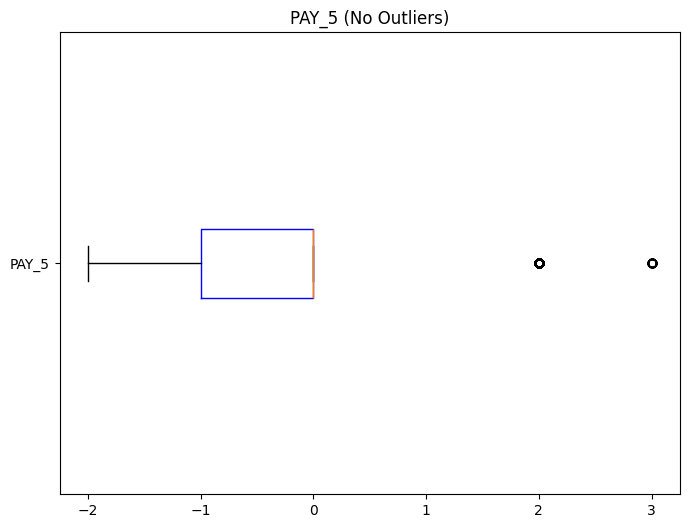

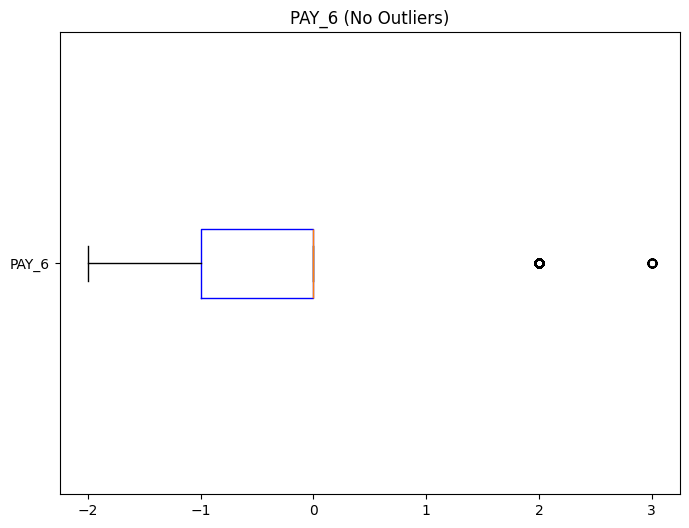

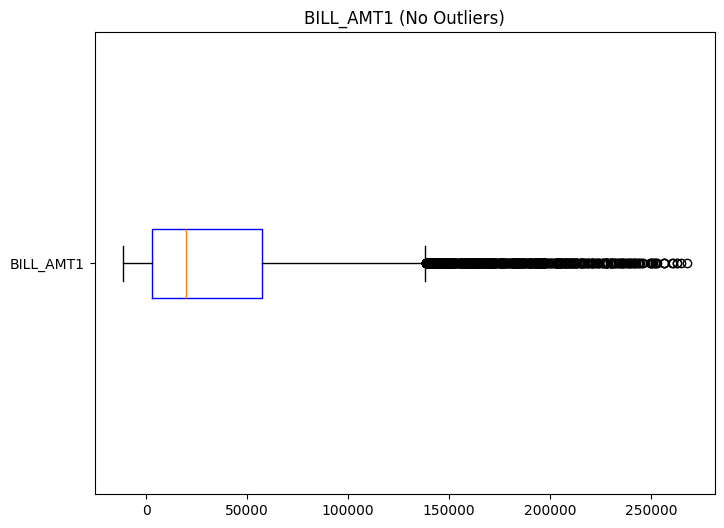

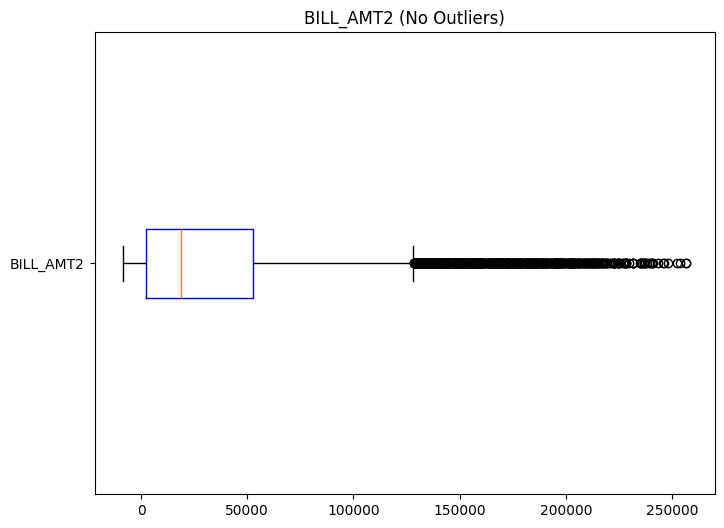

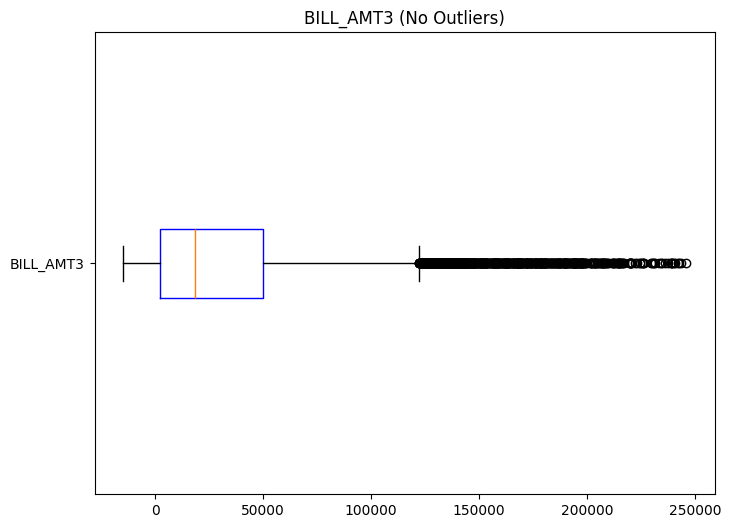

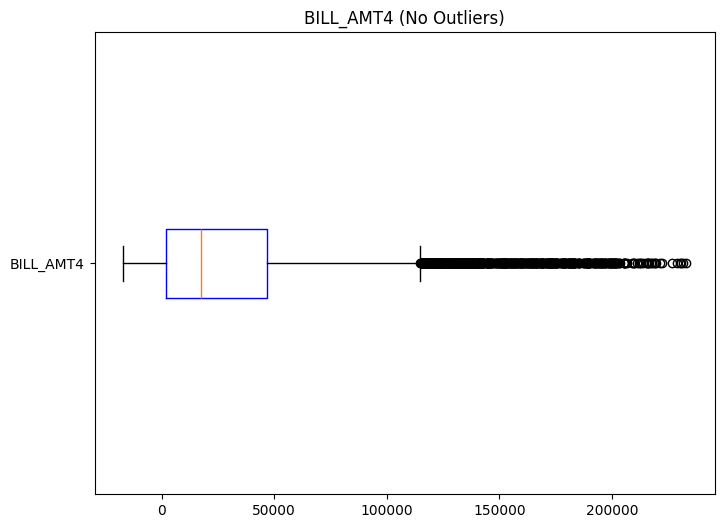

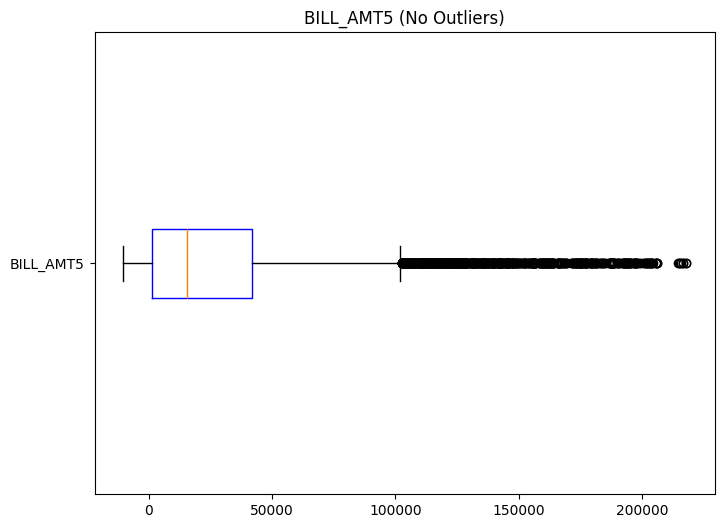

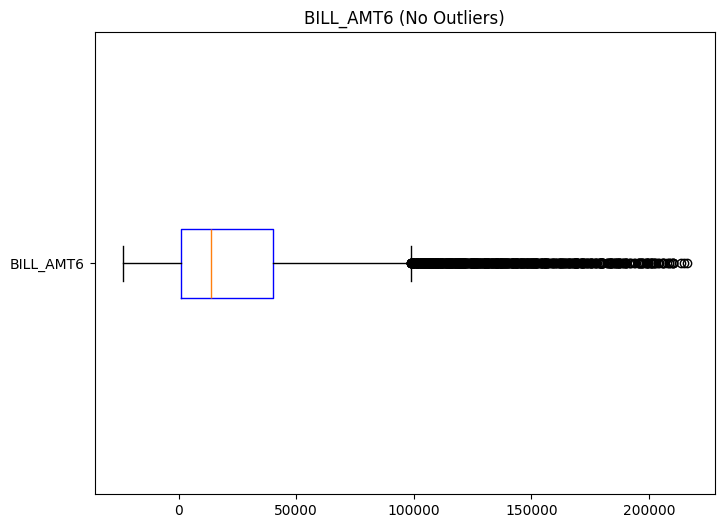

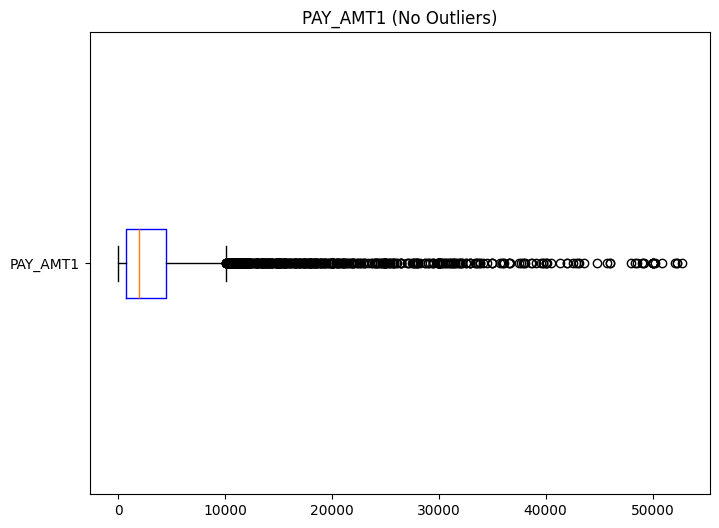

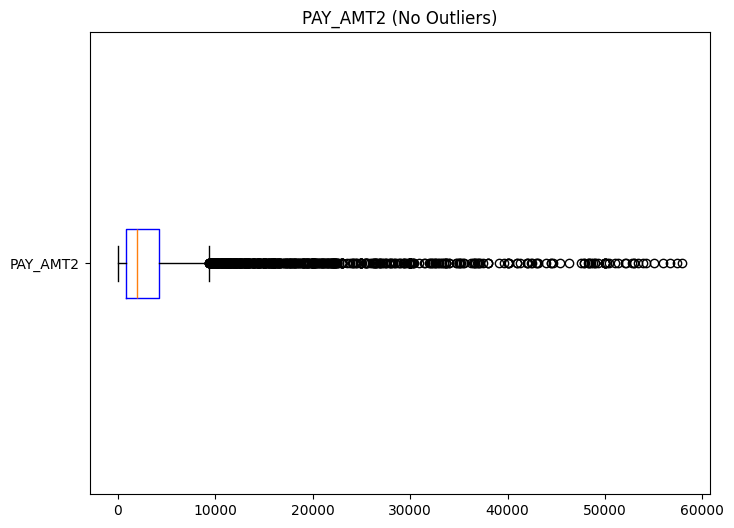

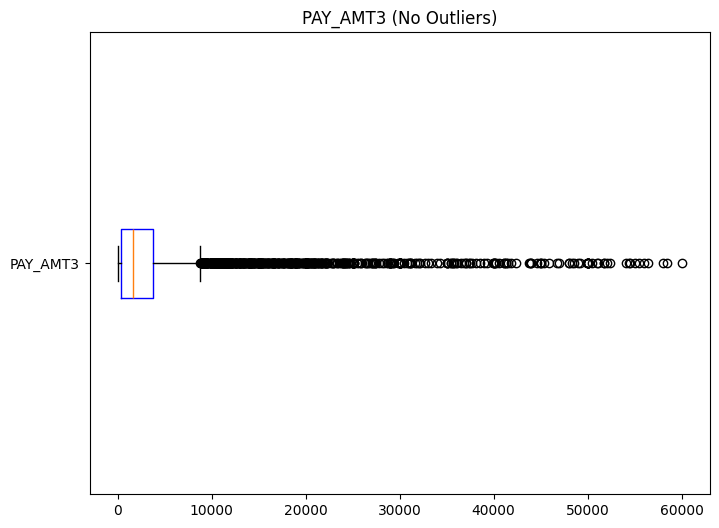

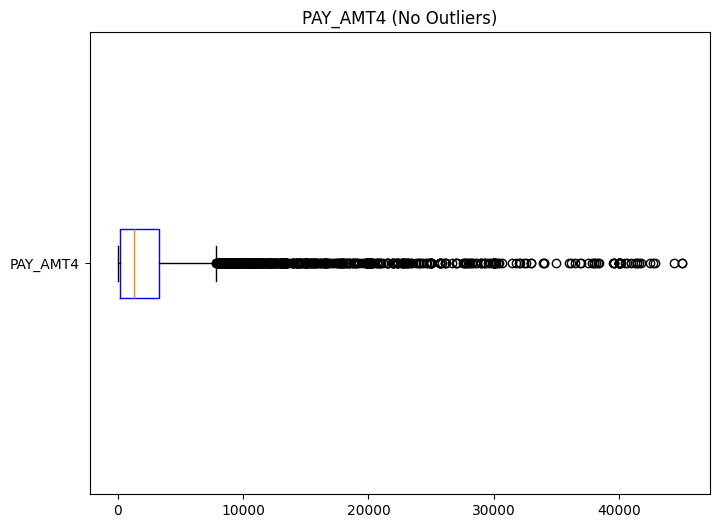

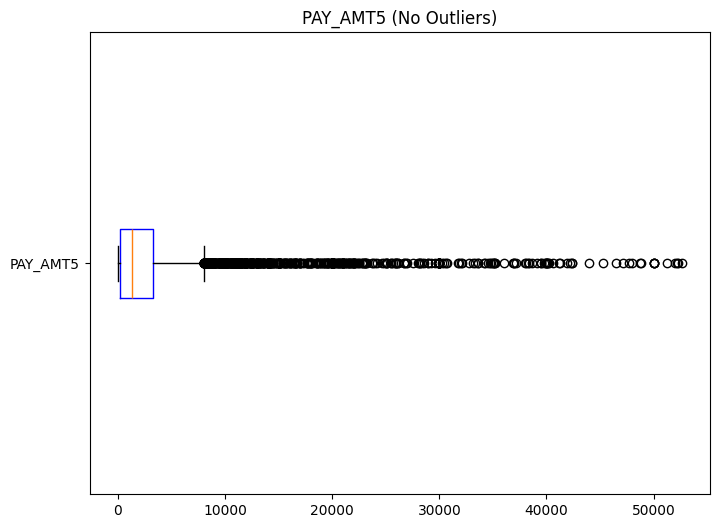

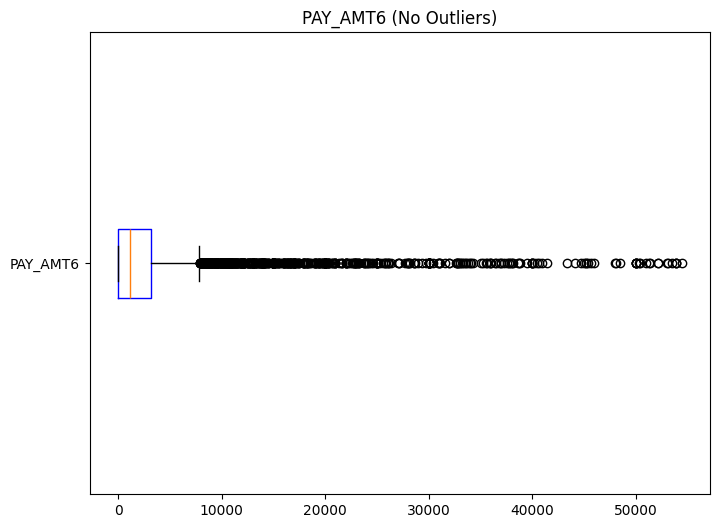

In [10]:
# Define a function to plot each feature against its index
for col in x.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot([x[col], outliers[col]], positions=[1, 2], labels=[f'{col} Normal', f'{col} Outliers'], vert=False, boxprops=dict(color="blue"), flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    plt.title(f'{col} vs. Outliers')
    plt.show()
    
clean_data = x[~x.index.isin(outliers.index)]

# Plot box plots without outliers
for col in clean_data.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(clean_data[col], labels=[col], vert=False, boxprops=dict(color="blue"))
    plt.title(f'{col} (No Outliers)')
    plt.show()

In [15]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

n=[2,3,4,5,6]
for i in n:

    kmedoids = KMedoids(n_clusters=i, random_state=0)  
    labels = kmedoids.fit_predict(x)

# Compute Silhouette Score -1 to 1 Higher Silhouette Scores indicate better clustering results.
    silhouette_avg = silhouette_score(x, labels)
    print('when we use k with value :',i)
    print("Silhouette Score:", silhouette_avg)
# Compute Calinski-Harabasz Index   Higher Calinski-Harabasz scores indicate better-defined clusters
    ch_score = calinski_harabasz_score(x, labels)
    print("Calinski-Harabasz Index:", ch_score)
# Compute Davies-Bouldin Index      Lower Davies-Bouldin Index values indicate better clustering results.
    dbi_score = davies_bouldin_score(x, labels)
    print("Davies-Bouldin Index:", dbi_score)
# Get cluster labels and medoids
    cluster_labels = kmedoids.labels_
    medoids = kmedoids.cluster_centers_

    print("Cluster labels:", cluster_labels)
    print('******************************************************************************************')


when we use k with value : 2
Silhouette Score: 0.3591288162060299
Calinski-Harabasz Index: 4003.171534065907
Davies-Bouldin Index: 1.2756744832295905
Cluster labels: [1 0 1 ... 0 0 0]
******************************************************************************************
when we use k with value : 3
Silhouette Score: 0.4247376127010451
Calinski-Harabasz Index: 6697.691137609627
Davies-Bouldin Index: 0.8871135903293136
Cluster labels: [1 0 1 ... 0 0 0]
******************************************************************************************
when we use k with value : 4
Silhouette Score: 0.3759146739095327
Calinski-Harabasz Index: 5770.827818587481
Davies-Bouldin Index: 0.8608339366799931
Cluster labels: [1 0 1 ... 2 2 2]
******************************************************************************************
when we use k with value : 5
Silhouette Score: 0.3872119347619807
Calinski-Harabasz Index: 6107.634774523382
Davies-Bouldin Index: 0.8725373893071392
Cluster labels: [1 0 4 ..

In [12]:
from sklearn.cluster import AgglomerativeClustering
n=[2,3,4,5,6]
for i in n:
    clustering = AgglomerativeClustering(n_clusters=i, linkage='single')

    labels=clustering.fit_predict(x)
# Compute Silhouette Score -1 to 1 Higher Silhouette Scores indicate better clustering results.
    silhouette_avg = silhouette_score(x, labels)
    print('when we use k with value :',i)

    print("Silhouette Score:", silhouette_avg)
# Compute Calinski-Harabasz Index   Higher Calinski-Harabasz scores indicate better-defined clusters
    ch_score = calinski_harabasz_score(x, labels)
    print("Calinski-Harabasz Index:", ch_score)
# Compute Davies-Bouldin Index      Lower Davies-Bouldin Index values indicate better clustering results.
    dbi_score = davies_bouldin_score(x, labels)
    print("Davies-Bouldin Index:", dbi_score)
# Get the labels of the clusters
    labels = clustering.labels_
    print(labels)
    print('******************************************************************************************')


when we use k with value : 2
Silhouette Score: 0.8977839597904818
Calinski-Harabasz Index: 132.88037847260549
Davies-Bouldin Index: 0.07167282688439058
[0 0 0 ... 0 0 0]
******************************************************************************************
when we use k with value : 3
Silhouette Score: 0.7540279866729627
Calinski-Harabasz Index: 78.299327591512
Davies-Bouldin Index: 0.13774905026458653
[0 0 0 ... 0 0 0]
******************************************************************************************
when we use k with value : 4
Silhouette Score: 0.7537223265201233
Calinski-Harabasz Index: 64.67966472838552
Davies-Bouldin Index: 0.13728530420352836
[0 0 0 ... 0 0 0]
******************************************************************************************
when we use k with value : 5
Silhouette Score: 0.7307079518239228
Calinski-Harabasz Index: 53.49812775740615
Davies-Bouldin Index: 0.1504571610493155
[0 0 0 ... 0 0 0]
*****************************************************

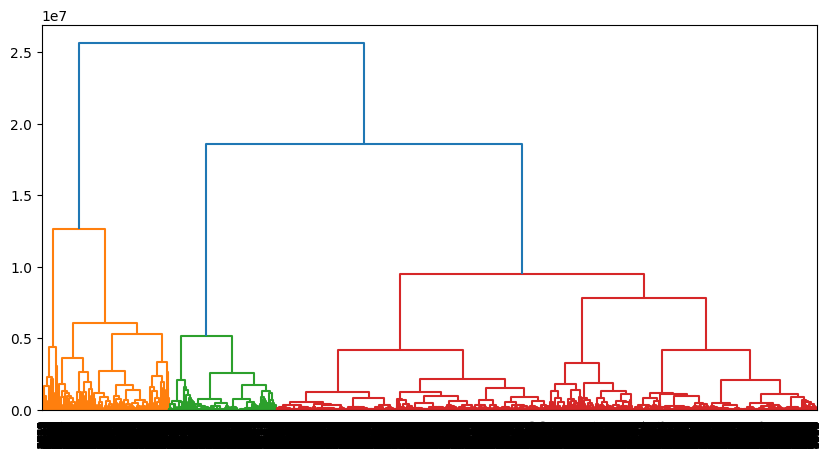

In [13]:
den = x[cols]
D = sch.distance.pdist(den)
L = sch.linkage(D, method='ward')

# Plot the dendrogram
fig = plt.figure(figsize=(10, 5))
dn = sch.dendrogram(L, leaf_rotation=90, leaf_font_size=8)
plt.show()

# Genatic Algorithm For Classification Task

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

POP_SIZE = 50
NUM_GENERATIONS = 10
MUTATION_RATE = 0.1
GreatestN=[]
# Define fitness function
def fitness_function(chromosome, X_train, y_train, X_test, y_test):
    # Train classifier  
    model = KNeighborsClassifier(n_neighbors=13)  # You can adjust the parameters here
    selected_features = X_train.columns[chromosome == 1]
        
            
   # classifier = KNeighborsClassifier(n_neighbors=11)  # You can adjust the parameters here
   # selected_features = X_train.columns[chromosome == 1]  # Get selected feature names
   
    model.fit(X_train[selected_features].values, y_train)  # Convert DataFrame to numpy array

    # Evaluate classifier on test set
    y_pred = model.predict(X_test[selected_features].values)  # Convert DataFrame to numpy array
    accuracy = accuracy_score(y_test, y_pred)
    print(f'THE ACCURACY FOR THE {chromosome} IS',accuracy)
    return accuracy

# Genetic algorithm
def genetic_algorithm(X_train, y_train, X_test, y_test):
    population = np.random.randint(2, size=(POP_SIZE, X_train.shape[1]))  # Initial population
    
    for _ in range(NUM_GENERATIONS):
        # Calculate fitness for each chromosome in the population
        fitness_scores = np.array([fitness_function(chromosome, X_train, y_train, X_test, y_test) for chromosome in population])
        
        # Select parents based on fitness scores
        selected_indices = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness_scores/fitness_scores.sum())
        parents = population[selected_indices]
        
        # Crossover
        crossover_point = np.random.randint(1, X_train.shape[1], size=POP_SIZE)
        offspring = np.zeros_like(parents)
        for i in range(0, POP_SIZE, 2):
            offspring[i, :crossover_point[i]] = parents[i, :crossover_point[i]]
            offspring[i, crossover_point[i]:] = parents[i+1, crossover_point[i]:]
            offspring[i+1, :crossover_point[i]] = parents[i+1, :crossover_point[i]]
            offspring[i+1, crossover_point[i]:] = parents[i, crossover_point[i]:]
        
        # Mutation
        mutation_mask = np.random.rand(POP_SIZE, X_train.shape[1]) < MUTATION_RATE
        offspring ^= mutation_mask
        
        # Replace population with offspring
        population = offspring
    
    # Select best chromosome from final population
    best_chromosome = population[np.argmax([fitness_function(chromosome, X_train, y_train, X_test, y_test) for chromosome in population])]
    
    return best_chromosome

# Run genetic algorithm
best_chromosome = genetic_algorithm(X_train, y_train, X_test, y_test)

# Train final classifier using best chromosome
final_classifier = KNeighborsClassifier(n_neighbors=13)  # You can adjust the parameters here
selected_features = X_train.columns[best_chromosome == 1].tolist()  # Convert boolean array to list of column names
final_classifier.fit(X_train_scaled.loc[:, selected_features], y_train)

# Evaluate final classifier on test set
print("Selected features:", selected_features)
y_pred = final_classifier.predict(X_test_scaled[selected_features])
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=final_classifier.classes_).plot()
plt.show()

THE ACCURACY FOR THE [0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0] IS 0.7715905301767255
THE ACCURACY FOR THE [0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1] IS 0.77459153051017
THE ACCURACY FOR THE [0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1] IS 0.7702567522507503
THE ACCURACY FOR THE [0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0] IS 0.7719239746582194
THE ACCURACY FOR THE [0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0] IS 0.7699233077692564
THE ACCURACY FOR THE [0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1] IS 0.7675891963987996
THE ACCURACY FOR THE [0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1] IS 0.7702567522507503
THE ACCURACY FOR THE [1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1] IS 0.7659219739913304
THE ACCURACY FOR THE [1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0] IS 0.766588862954318
THE ACCURACY FOR THE [0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0] IS 0.7715905301767255
THE ACCURACY FOR THE [0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0] IS 0.7669223074358119
TH

THE ACCURACY FOR THE [0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1] IS 0.7652550850283428
THE ACCURACY FOR THE [1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1] IS 0.7669223074358119
THE ACCURACY FOR THE [0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0] IS 0.7672557519173058
THE ACCURACY FOR THE [0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1] IS 0.7662554184728243
THE ACCURACY FOR THE [1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0] IS 0.7622540846948983
THE ACCURACY FOR THE [1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1] IS 0.7699233077692564
THE ACCURACY FOR THE [1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1] IS 0.7682560853617872
THE ACCURACY FOR THE [1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0] IS 0.7619206402134044
THE ACCURACY FOR THE [0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1] IS 0.7702567522507503
THE ACCURACY FOR THE [0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0] IS 0.7659219739913304
THE ACCURACY FOR THE [0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0] IS 0.7729243081027009

THE ACCURACY FOR THE [0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0] IS 0.7632544181393798
THE ACCURACY FOR THE [0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0] IS 0.7635878626208736
THE ACCURACY FOR THE [1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1] IS 0.7642547515838612
THE ACCURACY FOR THE [1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0] IS 0.7722574191397132
THE ACCURACY FOR THE [0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0] IS 0.7732577525841947
THE ACCURACY FOR THE [0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0] IS 0.7695898632877626
THE ACCURACY FOR THE [0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1] IS 0.7605868622874291
THE ACCURACY FOR THE [0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1] IS 0.7655885295098366
THE ACCURACY FOR THE [1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1] IS 0.7722574191397132
THE ACCURACY FOR THE [0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1] IS 0.7719239746582194
THE ACCURACY FOR THE [0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1] IS 0.7779259753251083

THE ACCURACY FOR THE [0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0] IS 0.7715905301767255
THE ACCURACY FOR THE [0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1] IS 0.7695898632877626
THE ACCURACY FOR THE [1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0] IS 0.7672557519173058
THE ACCURACY FOR THE [0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0] IS 0.7655885295098366
THE ACCURACY FOR THE [0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1] IS 0.7642547515838612
THE ACCURACY FOR THE [1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0] IS 0.7632544181393798
THE ACCURACY FOR THE [1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0] IS 0.7685895298432811
THE ACCURACY FOR THE [0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0] IS 0.768922974324775
THE ACCURACY FOR THE [1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0] IS 0.7672557519173058
THE ACCURACY FOR THE [1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0] IS 0.7722574191397132
THE ACCURACY FOR THE [1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0] IS 0.7625875291763922


THE ACCURACY FOR THE [0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0] IS 0.7749249749916639
THE ACCURACY FOR THE [1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0] IS 0.7712570856952318
THE ACCURACY FOR THE [0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1] IS 0.766588862954318
THE ACCURACY FOR THE [1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1] IS 0.7612537512504168
THE ACCURACY FOR THE [1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1] IS 0.7755918639546515
THE ACCURACY FOR THE [0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1] IS 0.7625875291763922
THE ACCURACY FOR THE [1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1] IS 0.7629209736578859
THE ACCURACY FOR THE [0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0] IS 0.7659219739913304
THE ACCURACY FOR THE [1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1] IS 0.766588862954318
THE ACCURACY FOR THE [1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1] IS 0.7702567522507503
THE ACCURACY FOR THE [0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1] IS 0.7645881960653551
T

KeyboardInterrupt: 